In [1]:
import pickle as pkl 
import pandas as pd
import matplotlib.pyplot as plt  

In [4]:
cancer = pkl.load(open('cancer_sim_0_0.p',mode="rb"))

cancer

ValueError: unsupported pickle protocol: 3

In [6]:
def build_data(outputs, patient):
    
    df = pd.DataFrame({'patient_id': patient,
                        'cancer_volume': outputs['cancer_volume'][patient],
                      'chemo_dosage': outputs['chemo_dosage'][patient],
                      'radio_dosage': outputs['radio_dosage'][patient],
                      'recovery_flags': outputs['recovery_flags'][patient],
                      'chemo_application': outputs['chemo_application'][patient],
                      'patient_types': outputs['patient_types'][patient],
                      'radio_application': outputs['death_flags'][patient],
                      'death_flags': outputs['death_flags'][patient],
                      'radio_probabilities': outputs['death_flags'][patient],
                      'chemo_probabilities': outputs['death_flags'][patient],     
                      })
    df = df[['patient_id','patient_types','cancer_volume', "chemo_dosage", "radio_dosage","chemo_probabilities","chemo_application",\
             "radio_probabilities","radio_application","death_flags","recovery_flags"]]
    return df

def build_dataset(data, number_of_patient):
    df = build_data(data,0)
    
    for i in range(1,number_of_patient):
        df = pd.concat([df, build_data(data,i)])
    return df

In [72]:


train = build_dataset(cancer["training_data"], 10000)
train.to_csv("cancer_training_data.csv")

val = build_dataset(cancer["validation_data"], 1000)
val.to_csv("cancer_validation_data.csv")

test = build_dataset(cancer["test_data"], 1000)
test.to_csv("cancer_test_data.csv")

In [91]:
def plot_treatments(outputs, patient):
    df = pd.DataFrame({'cancer_volume': outputs['cancer_volume'][patient],
                      'chemo_dosage': outputs['chemo_dosage'][patient],
                      'radio_dosage': outputs['radio_dosage'][patient],
                       'recovery_flags': outputs['recovery_flags'][patient],
                       'death_flags': outputs['death_flags'][patient],
                      })
    df = df[['cancer_volume', "chemo_dosage", "radio_dosage"]]
    df.plot(secondary_y=['chemo_dosage', 'radio_dosage'])
    plt.xlabel("$t$")
    plt.show()

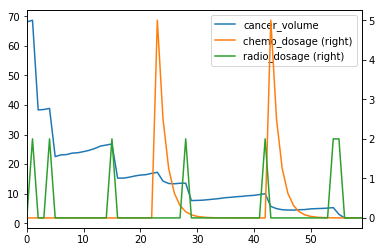

In [96]:
plot_treatments(cancer['training_data'],6000)

Patient censoring is incorporated by modeling

1) death when tumor diameters reach Dmax = 13 cm (or a volume of Vmax = 1150 cm3 assuming perfectly spherical tumors), 

2) recovery determined by a Bernoulli process with recovery probability pt = exp(−Vt), and 

3) termination of observations after 60 days (administrative censoring). Treatment

In [7]:
test = build_dataset(cancer["test_data"], 1000)

In [9]:
cancer


{'chemo_coeff': 10,
 'num_time_steps': 60,
 'radio_coeff': 10,
 'scaling_data': (cancer_volume    31.981751
  chemo_dosage      0.733287
  patient_types     2.006500
  radio_dosage      0.149837
  dtype: float64, cancer_volume    83.316237
  chemo_dosage      1.514951
  patient_types     0.818815
  radio_dosage      0.526520
  dtype: float64),
 'test_data': {'cancer_volume': array([[1.20239857e+01, 1.26814348e+01, 1.33203359e+01, ...,
          1.89617146e+00, 1.94812526e+00, 2.07032885e+00],
         [1.85954793e-01, 1.99969014e-01, 2.10968289e-01, ...,
          2.09158899e-01, 2.22200649e-01, 2.39543424e-01],
         [3.85328125e+02, 3.88305349e+02, 3.96228579e+02, ...,
          6.82714478e-01, 7.17546606e-01, 6.36460562e-01],
         ...,
         [1.75663398e-02, 1.77676937e-02, 1.78809802e-02, ...,
          3.23138197e-03, 3.17026717e-03, 3.12909635e-03],
         [1.01892923e+01, 1.04769861e+01, 1.07947148e+01, ...,
          1.65850668e-01, 1.73493270e-01, 1.83964908e-01],
